In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('ECG200TRAIN', header = None)
y = df.iloc[:, 0]


In [3]:
X = df.iloc[:, 1:96]
X.iloc[0, :]

1     0.50206
2     0.54216
3     0.72238
4     1.42890
5     2.13650
       ...   
91    0.58324
92    0.64052
93    0.70859
94    0.70501
95    0.71382
Name: 0, Length: 95, dtype: float64

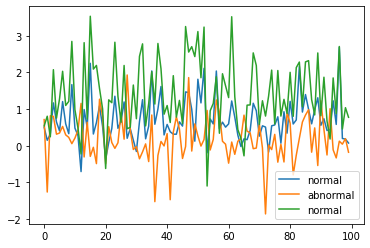

In [4]:
plt.plot(X[1], label ='normal')
plt.plot(X[95], label = 'abnormal')
plt.plot(X[2], label ='normal')
plt.legend()
plt.show()

In [5]:
from scipy.interpolate import splrep

In [6]:
knots = np.linspace(1,95,8)
len(knots)

8

In [7]:
"""Bspline to estimate the Spline coefficients"""
beta =[]
for i in range(0,len(X)):
    t,c,k =splrep(knots, X.iloc[i,:], k =3)
    beta.append(c)

TypeError: Lengths of the first three arguments (x,y,w) must be equal

In [11]:
""" BSpline coefficient matrix"""
betaX =np.array(beta)




In [22]:
"""PAC on BSpline coefficient matrix """
from sklearn.decomposition import PCA
pca = PCA(n_components =6)
principalComponents = pca.fit_transform(betaX)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3','principal component 4','principal component 5',
                         'principal component 6'])

pca.explained_variance_ratio_

array([0.35018669, 0.20874279, 0.09726938, 0.05743618, 0.0415169 ,
       0.03246867])

In [26]:
""" Perform SVM on B-coefficient"""
from sklearn.svm import SVC
clf = SVC(gamma = 'auto')

In [27]:
clf.fit(betaX,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
""" Perform SVM on principal Matrix"""

clf1 = SVC(gamma='auto')
clf1.fit(principalDf, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
test = pd.read_csv('ECG200TEST', header = None)

In [33]:
y_test = test.iloc[:,0]
X_test = test.iloc[:,1:96]

In [34]:

betatest =[]
for i in range(0,len(X_test)):
    t,c,k =splrep(knots, X_test.iloc[i,:], k =3)
    betatest.append(c)
btest =np.array(betatest)

In [35]:
btest.shape
principalTest= pca.transform(btest)
principalDf_test = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3','principal component 4','principal component 5',
                         'principal component 6'])

In [36]:

y_test_pred_bspline = clf.predict(btest)
y_test_pred_FPCA =clf1.predict(principalDf_test)


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_Bspline = accuracy_score(y_test, y_test_pred_bspline)
accuracy_FPCA =accuracy_score(y_test, y_test_pred_FPCA)


In [40]:
print(' Performing SVM Classifier on BSpline coefficients gives', accuracy_Bspline,'on test set')
print(' Performing SVM Classifier on FPCA with 6 pricipal components gives', accuracy_FPCA,'on test set')


 Performing SVM Classifier on BSpline coefficients gives 0.86 on test set
 Performing SVM Classifier on FPCA with 6 pricipal components gives 0.5 on test set
